# Creative Project : Poem Generator
### Michael Osmian
### English 140


For the creative project I decided to utilize both my interest in computer science and literature. I first cleaned and saved the text from each text file (corpus). These being:

* All 250 of Sylvia Plath's Poems
* Notes from Underground - Dostoevsky
* The Metamorphosis - Kafka
* Collected Work of Nietzsche

After this, I plotted the word-frequency distributions for the top 50 most occuring words in each dataset to see the differences between the authors in word choice. These frequency plots omit stop words such as 'and', 'I', 'the'..etc because they don't provide much insight in terms of frequency. After this, I began the sentence and poem generating process. This project utilizes the library markovify for generating the markov models that create sentences from the text files. The state size for each state within the markov chain is set to two by default. It is important to note that the sentences generated are not direct copies from sentences within the data files because it utilizes NLTK's POS tagging to ensure the sentence structure is accurate but the markov models determine the word choice based on START and END positions of words. For generating the poems, I just sampled uniformly on an interval from 5-20 to determine the poem length and generated sentences of max 100 characters for each line.  






## Data Cleaning and Library Imports

In [57]:
import nltk
import numpy as np
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk import sent_tokenize
from nltk.util import ngrams
import string
import re
import random
import markovify
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["figure.figsize"] = (30,15)
sns.set()

# Method for cleaning data, only used in the custom bigram model
def clean_text(file_name):
    #Open file for reading
    f=open(file_name,'r',errors = 'ignore')
    txt=f.read()
    txt = txt.replace("'","")
    f.close()
    
    #Clean Data, lowercase all words and remove punctuation
    word_tokens = word_tokenize(txt)
    word_tokens = [w.lower() for w in word_tokens] #LowerCase all words

    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in word_tokens] #Punctuation Removal
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()] #Only Alphabetic Chars
    return words

# Write the cleaned data to file for use
def write_to_cleaned(data,filename):
    clean_temp = ' '.join(data)
    c = open(filename,'w')
    for i in clean_temp:
        c.write(i)
    c.close()

# Returns Plotting Data for the text files
def get_freq(c):
    x = [] #Words
    y = [] #Frequency
    
    stop_words = set(stopwords.words('english'))
    uniques = set(c)
    freqs = {}
    for i in c:
        if i not in freqs:
            freqs[i] = 1
        else:
            freqs[i]+=1

    # Sorting from most frequent - least frequnt
    freqs = list(freqs.items())
    freqs.sort(key=lambda x: x[1], reverse=True)

    for i in range(len(freqs)):
        if freqs[i][0] not in stop_words: #Ignoring Stop Words for useful visualization
            x.append(freqs[i][0])
            y.append(freqs[i][1])
    return x,y

# This class overrides the default Text class because it utilizes NLTK's POS tag
class POSifiedText(markovify.Text):
    def word_split(self, sentence):
        words = re.split(self.word_split_pattern, sentence)
        words = [ "::".join(tag) for tag in nltk.pos_tag(words) ]
        return words

    def word_join(self, words):
        sentence = " ".join(word.split("::")[0] for word in words)
        return sentence


# Cleaning the text and writing to new file   
cleaned_plath = clean_text("plath.txt")
write_to_cleaned(cleaned_plath,'cleaned_plath.txt')

cleaned_underground = clean_text('underground.txt')
write_to_cleaned(cleaned_underground,'cleaned_underground.txt')

cleaned_metamorphosis = clean_text('metamorphosis.txt')
write_to_cleaned(cleaned_metamorphosis,'cleaned_metamorphosis.txt')

cleaned_nietszche = clean_text('nietzsche.txt')
write_to_cleaned(cleaned_nietszche,'cleaned_nietzsche.txt')

## Visualizing Word Frequency

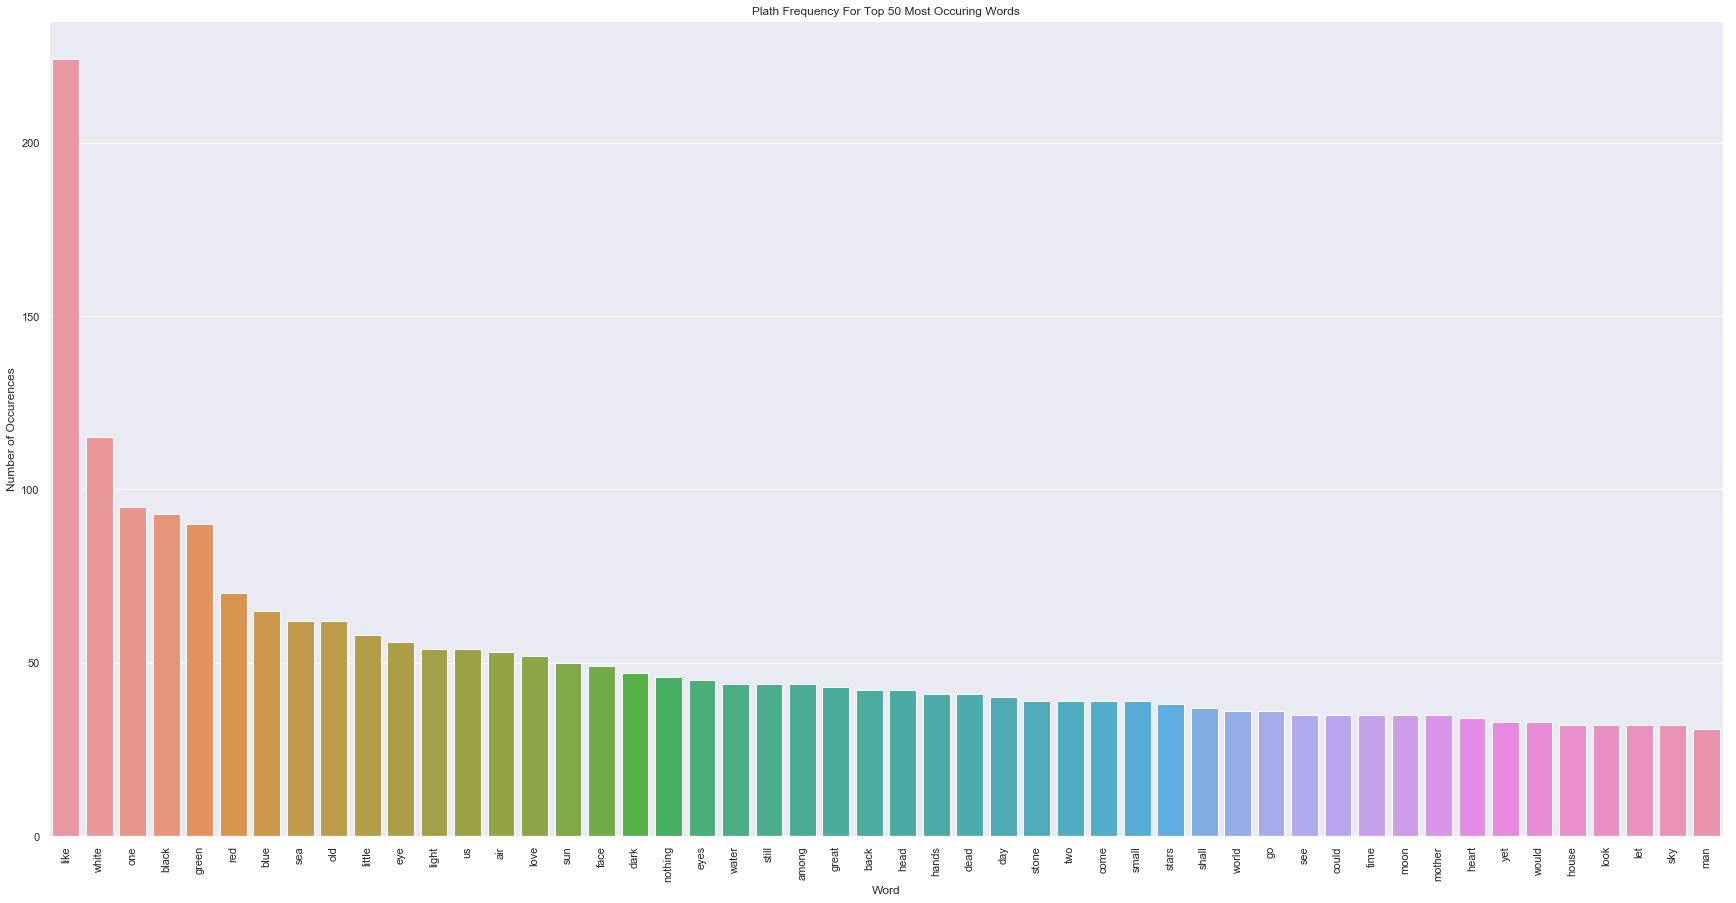

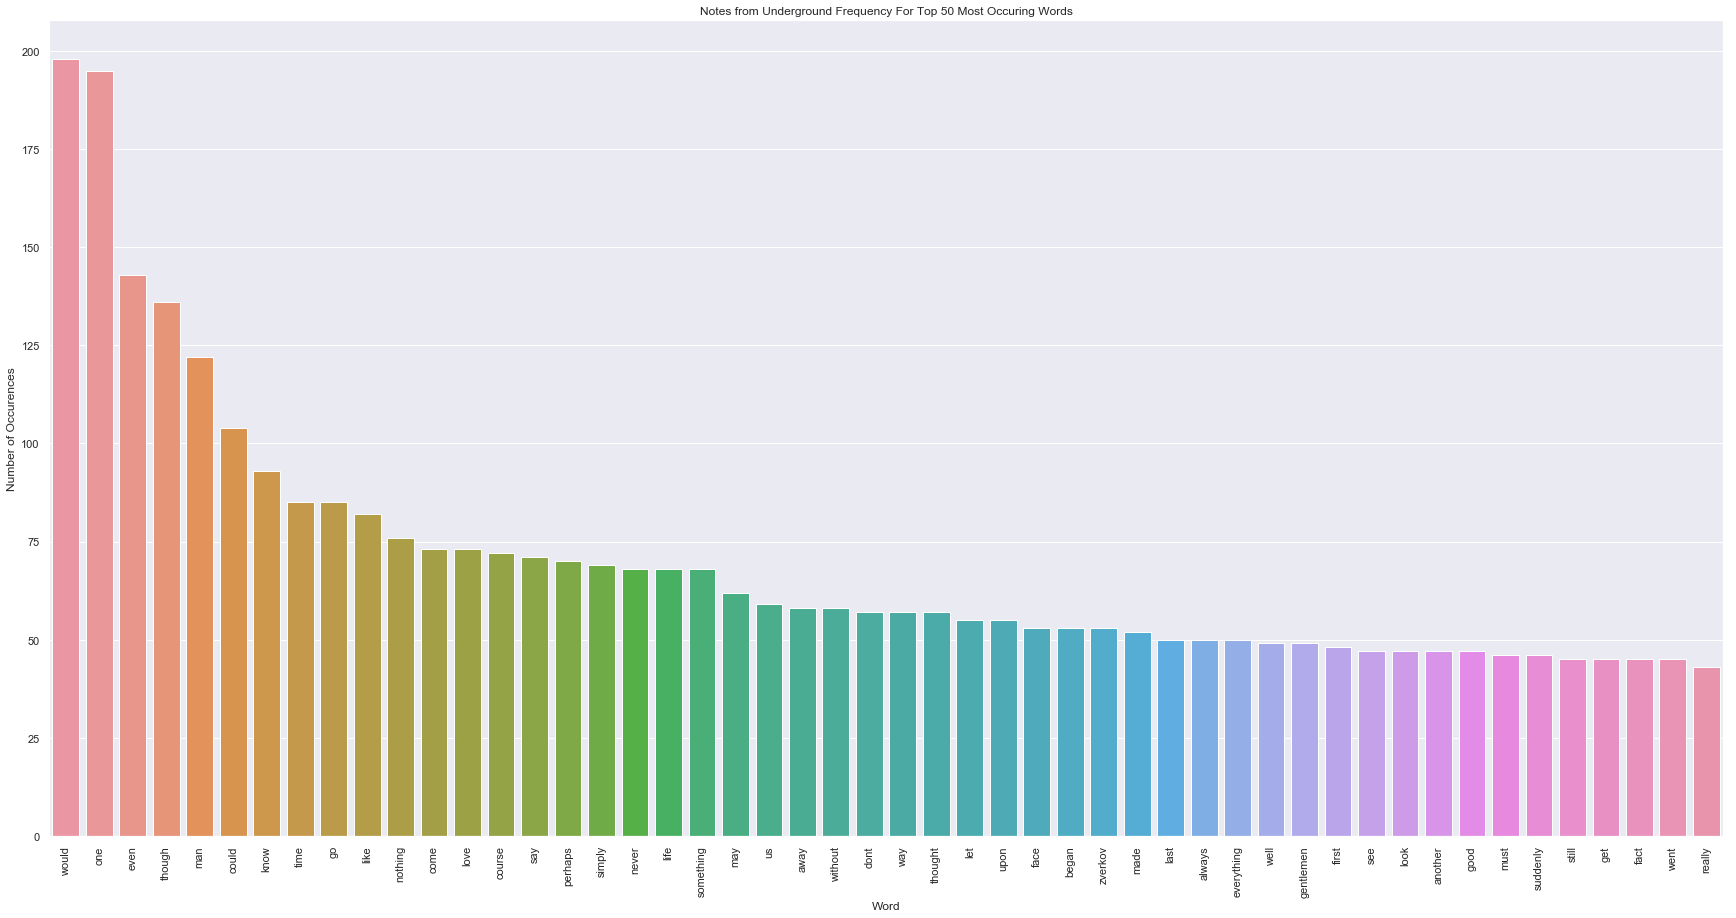

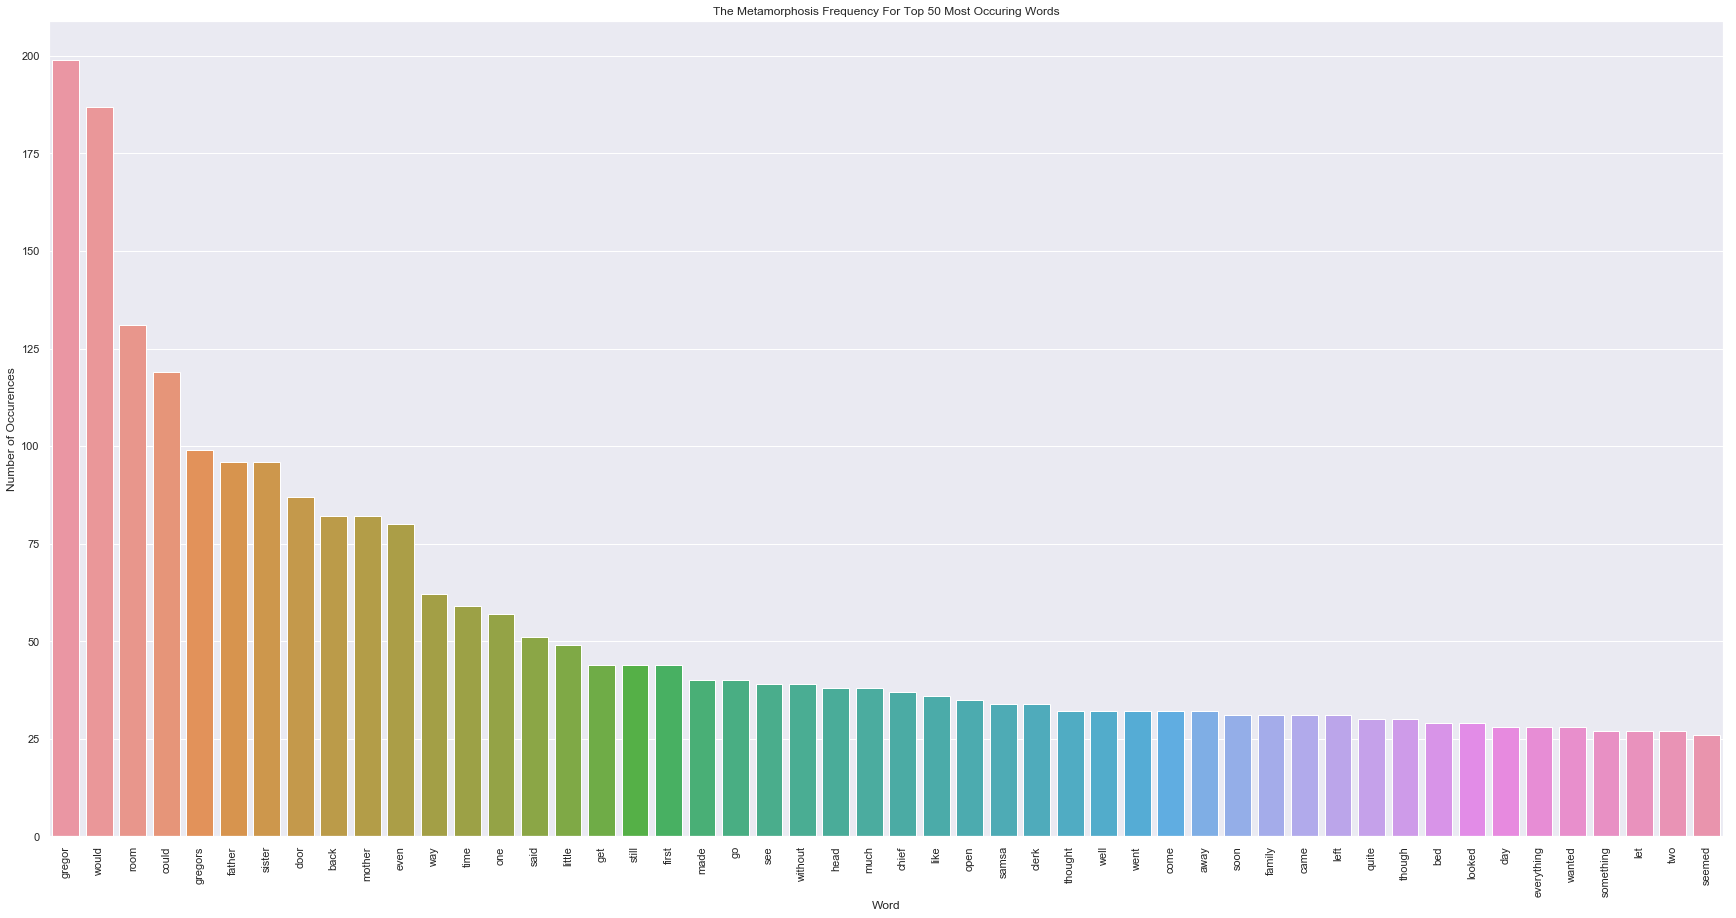

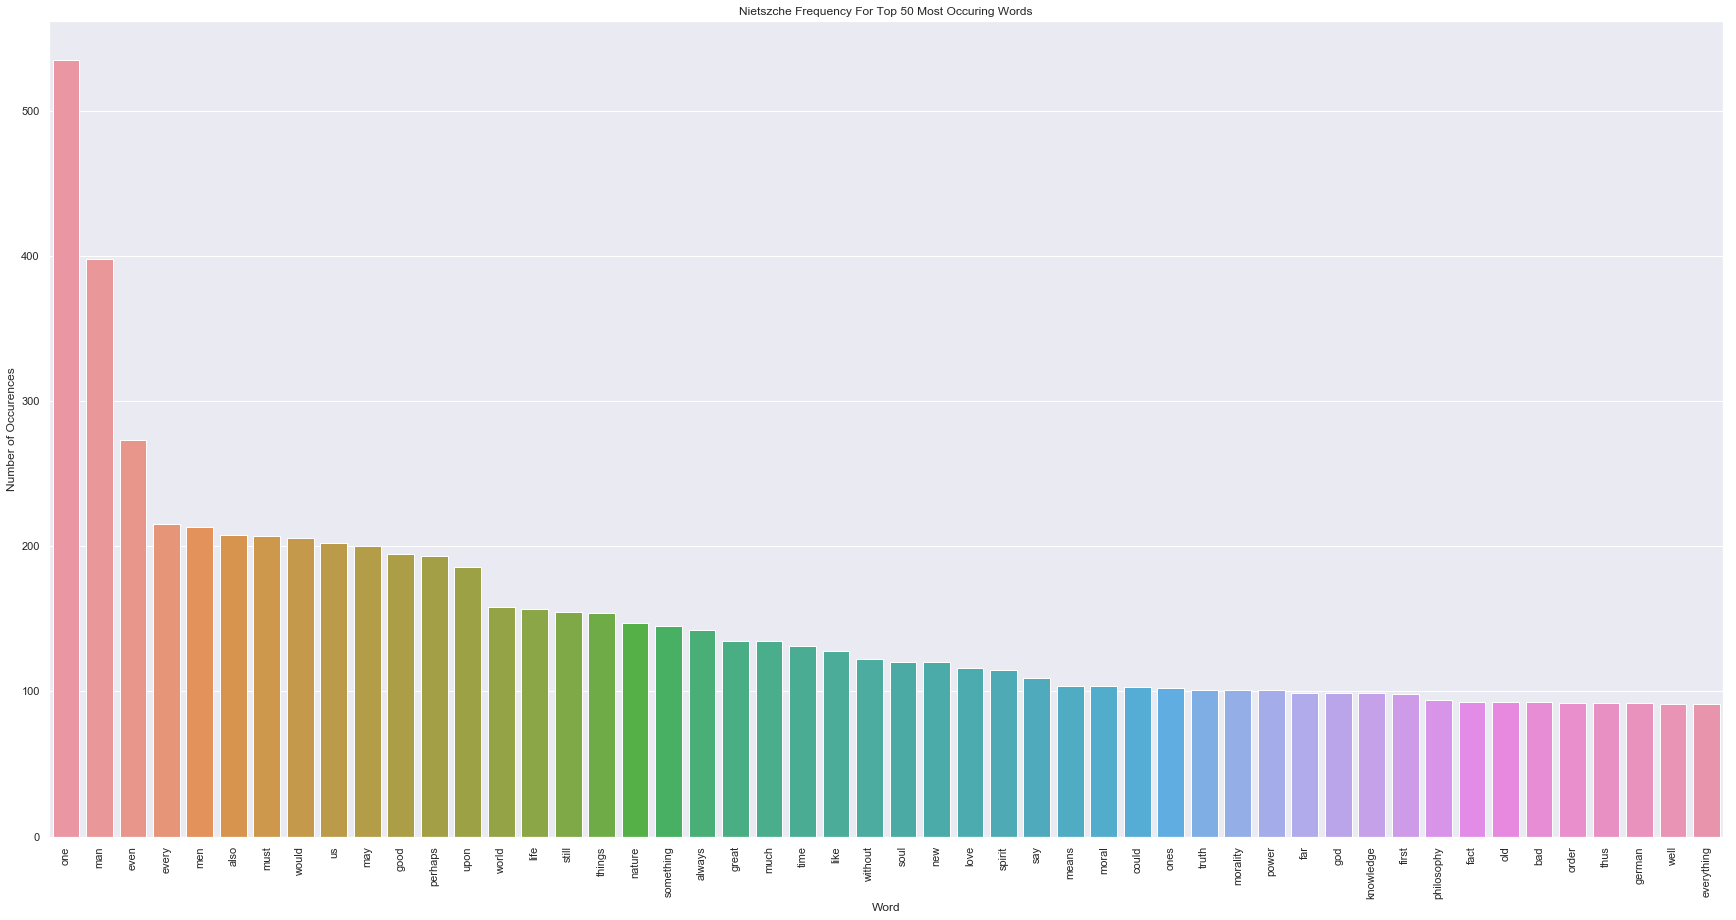

In [58]:
x,y = get_freq(cleaned_plath)
plt.xticks(rotation = 90)
plt.title("Plath Frequency For Top 50 Most Occuring Words")
plt.ylabel('Number of Occurences')
plt.xlabel("Word")
sns.barplot(x[:50],y[:50])
plt.show()

x,y = get_freq(cleaned_underground)
plt.xticks(rotation = 90)
plt.title("Notes from Underground Frequency For Top 50 Most Occuring Words")
plt.ylabel('Number of Occurences')
plt.xlabel("Word")
sns.barplot(x[:50],y[:50])
plt.show()

x,y = get_freq(cleaned_metamorphosis)
plt.xticks(rotation = 90)
plt.title("The Metamorphosis Frequency For Top 50 Most Occuring Words")
plt.ylabel('Number of Occurences')
plt.xlabel("Word")
sns.barplot(x[:50],y[:50])
plt.show()

x,y = get_freq(cleaned_nietszche)
plt.xticks(rotation = 90)
plt.title("Nietszche Frequency For Top 50 Most Occuring Words")
plt.ylabel('Number of Occurences')
plt.xlabel("Word")
sns.barplot(x[:50],y[:50])
plt.show()

## Creating the Markov Models from Text Data

In [59]:
# Opening the text files and creating models for use

# All 250 Poems by Sylvia Plath
with open("plath.txt") as f:
    plath_txt = f.read()
    
plath_model = markovify.NewlineText(plath_txt,state_size = 2)
    
# Notes From Underground - Dostoevsky
with open('underground.txt') as f:
    underground_txt = f.read()

undegrnd_model = POSifiedText(underground_txt,state_size = 3)
    
# Metamorphosis - Kafka
with open('metamorphosis.txt') as f:
    metamorphosis_txt = f.read()
    
metamorph_model = POSifiedText(metamorphosis_txt)

# Brothers Karamazov - Dostoevsky
with open('karamazov.txt') as f: 
    karamazov_txt = f.read()
    
karamazov_model = POSifiedText(karamazov_txt)
    
# All of Nietzsche 
with open('nietzsche.txt') as f:
    nietzsche_txt = f.read()
    
niet_model = POSifiedText(nietzsche_txt,state_size = 3)

### Generating Poems from Sylvia Plath Data

In [60]:
# Generating Sample Poems From Plath
print('Computer Generate Sylvia Plath Sentences & Poems')
print()
print("100 Randomly Generated Sentences  \n")
for i in range(100): 
    if plath_model.make_sentence()!='None':
        print(plath_model.make_sentence(tries = 100))
print()

# Print three randomly-generated sentences of no more than 100 characters, also do it 4 times (similar to a poem?)
for s in range(5):
    print('POEM: ' + str(s+1))
    for i in range(8):
        print(plath_model.make_short_sentence(100)) # Cap the sentence length
    print()
    
for s in range(5):
    print('POEM: ' + str(s+1))
    for i in range(15):
        print(plath_model.make_short_sentence(100))
    print()

Computer Generate Sylvia Plath Sentences & Poems

100 Randomly Generated Sentences  

My head on the nursery wall,
Here he comes now, among the flat leer of the earth and the lovers
As the light of the noon sun striking
Of his mind. And now you try
Backtalks at the margins of a clock,
Makeshift of a white saint rave
In spite of herself,
Ticking your fingers on the stern seat, from the wall.
The deathly guests had not asked for such a ruin.
With voices of sorrow
They are eaten immediately by the faces of my neighbor's rose bush
Like a dead foot,
I bent over the lead sea
I had nothing to do violence on,
I'll go out and sit in a cloud.
Where once a day on her back as the gray people
And the soul is a poor coat. I inhabit
The jut of that ambiguous sea
Sliding shut on the ceiling.
The day-moon lights up like a castle, from the crest of the sea.
Ponderous and extend despair on earth's bedrock. Almost thrown, not
Moon full, moon dark, the pitying eye.
Whiteness being what I did.
With its prim

## Generating Sentences from Nietszche Data

In [61]:
# Generating Sentences by Nietszche
for i in range(25):
    s = niet_model.make_sentence(tries = 100)
    s = s[0]+ s[1:].lower()
    if not re.search('\d+', s) and '=' not in s:
        print(s + '\n')

But such a god does not know the full extent of his own susceptibility.

Was it not necessary in the end even hallowing and vindicating it.

He acknowledges under certain circumstances, which made him hesitate at first, that there are higher and deeper conceptions of good and evil.

And to ask once more the path to the fundamental problems.

There are books which have an inverse value for the soul and he feels himself once more free and courageous.

On the other hand, progress in the sense and along the lines of the old maid about him; for, like her, he is not willy-nilly the absolute servant of nature.

Pride is their support if the passion and the comprehension of men that they have something which they hide--namely, intellect.

It is among them that the most powerful incentives to certain acts and away from other acts.

And the disenchantment of woman is slowly evolving?

A valiant army is evidence of the value of life, because in that case the rest of the cosmos on a pivot that he 

## Generating Sentences from Notes from Underground

In [62]:
for i in range(25):
    print(undegrnd_model.make_sentence(tries = 100))
    print()
#     print()

There was no one there.

There was no answer, but continue staring at me just before.

I am forty years old now, and you know that is the chief thing.

He loves the process of the game, not the end of it; no historian would be equal to the job.

Ech! gentlemen, but of course he knows himself that he is doing a just and honest thing.

In short, if this could be arranged there would be a ball for the whole of the nineteenth century must and morally ought to be kept on a curb.

For some reason I dislike those laws and the fact that the melting snow was still falling in heavy flakes.

As the children grow up you feel that you are more sinned against than sinning.

I returned home completely upset, it was just because I was more highly developed.

I should certainly never have made up my mind for some reason I believe that the best definition of man is the ungrateful biped.

The point was that all this was, as it were, especially, as it were, with tears in my eyes--but still I did go out ag

## Generating Poems of varying length using the Slyvia Plath data (Saved to File)

In [63]:
#Generating 25 poem lines from plath and saving them to a file
final = []
tf = open("plath_generated.txt",'w')
for i in range(100):
    tf.write('\n')
    temp = []
    length_of_poem = random.randint(5,20)
    for i in range(length_of_poem):
        s = plath_model.make_sentence(tries = 100)
        temp.append(s)
    tf.write('\n'.join(temp))
    tf.write('\n')
tf.close()

## Combining Different Authors (Nietszche and Underground Man)

In [64]:
model_combo = markovify.combine([ niet_model, undegrnd_model ], [ 1, 1 ])
for i in range(25):
    s = model_combo.make_sentence(tries = 100)
    s = s[0]+ s[1:].lower()
    if not re.search('\d+', s) and '=' not in s:
        print(s + '\n')

Whoever, like myself, prompted by some enigmatical desire, has long endeavoured to go to the length of contemplating making friends with them.

Why, in the first place in order to feel pleasure oneself?

And it isn't the beastliness of it that some say that it is well to be so.

The light of the furthest stars is longest in reaching man; and before it all ancient education, controlled the whole domain of ethical notions is one of the sort who would consent to fight a duel?

I don't consult a doctor from spite.

But, you know, this is what is happening nowadays let us not be afraid!

But as it always happened that such reflections impelled me, as though purposely, occurred to me on the head and they may belabour me from behind.

So also an opinion gives happiness, therefore it is itself good and true.

And this being so, can one help being tempted to rejoice that it has fallen, that all dogma lies on the ground--nay more, that it is inconsistent?

Justice is therefore reprisal and excha